<a href="https://colab.research.google.com/github/vamsisripada/Machine-Learning/blob/main/regression%20on%20company%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
company = pd.read_csv('Company_data.csv')

***Company dataset that contains information about advertisements of products on different platforms and their sales.***

In [8]:
company.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
company.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
company.shape

(200, 4)

In [11]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
company.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
company.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [15]:
company.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

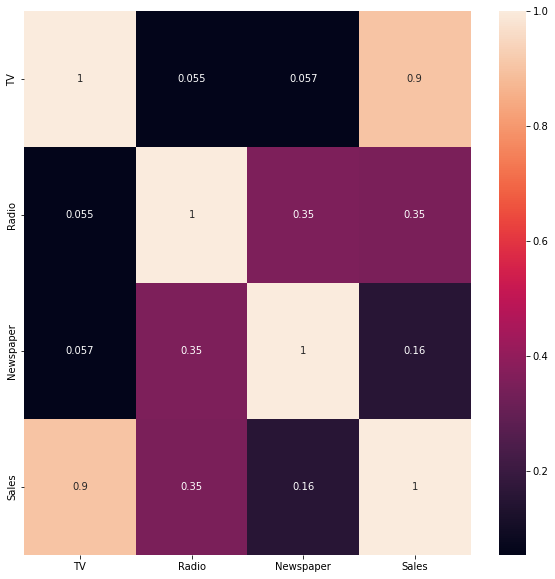

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(company.corr(),annot=True)

***We see that advertisements given on TV and sales are highly correlated compared to others.***

In [16]:
# Storing the columns TV and sales to perform regression
X = company.iloc[:,0]
y = company.iloc[:,-1]

In [17]:
# Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 0)

In [18]:
#printing the shapes
print(X_train.shape,X_test.shape)
y_train.shape,y_test.shape

(140,) (60,)


((140,), (60,))

In [19]:
# reshaping the data

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [20]:
# Shapes after reshaping the data
print(X_train.shape,X_test.shape)
y_train.shape,y_test.shape

(140, 1) (60, 1)


((140, 1), (60, 1))

In [21]:
#Fitting the model i.e making it learn
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
#Performing evaluation metrics based on the training data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = reg.predict(X_train)
print('Performance of the model based on training data:')
print(f'MAE: {mean_absolute_error(y_train,y_pred)}')
print(f'MSE: {mean_squared_error(y_train,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train,y_pred))}')
print(f'R2_Score: {r2_score(y_train,y_pred)}')

Performance of the model based on training data:
MAE: 1.81882800711975
MSE: 5.0779600089908765
RMSE: 2.253432938649579
R2_Score: 0.805941153711277


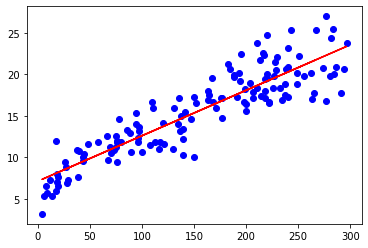

In [23]:
# drawing a straight line for the predicted and actual outputs of training data

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,y_pred,c='r',linestyle='solid')
plt.show()

In [24]:
#Performing evaluation metrics based on the testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = reg.predict(X_test)
print('Performance of the model based on testing data:')
print(f'MAE: {mean_absolute_error(y_test,y_pred1)}')
print(f'MSE: {mean_squared_error(y_test,y_pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred1))}')
print(f'R2_Score: {r2_score(y_test,y_pred1)}')

Performance of the model based on testing data:
MAE: 1.8639438916550555
MSE: 5.569539193467241
RMSE: 2.3599871172248466
R2_Score: 0.8150168765722069


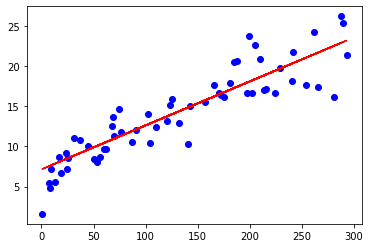

In [25]:
# drawing a straight line for the predicted and actual outputs of testing data

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test,y_pred1,c='r',linestyle='solid')
plt.show()

In [26]:
# importing Lasso from linear_model
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [28]:
# fitting the model i.e. making it learn using Lasso Regression algorithm
reg = Lasso(alpha = 9)
reg.fit(X_train,y_train)

Lasso(alpha=9)

In [29]:
#Predicting based on training data and performing evaluation metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_predict = reg.predict(X_train)
mae = mean_absolute_error(y_train,y_predict)
mse = mean_squared_error(y_train,y_predict)
rmse = np.sqrt(mean_squared_error(y_train,y_predict))
r2_sc = r2_score(y_train,y_predict)
print('Performance of model based on the training data:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2_Score: {r2_sc}')

Performance of model based on the training data:
MAE: 1.8215408762942276
MSE: 5.089465585630057
RMSE: 2.2559843939243147
R2_Score: 0.8055014576670914


In [30]:
#Predicting based on testing data  and performing evaluation metrics

y_predict1 = reg.predict(X_test)
mae = mean_absolute_error(y_test,y_predict1)
mse = mean_squared_error(y_test,y_predict1)
rmse = np.sqrt(mean_squared_error(y_test,y_predict1))
r2_sc = r2_score(y_test,y_predict1)
print('Performance of model based on the training data:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2_Score: {r2_sc}')

Performance of model based on the training data:
MAE: 1.8781999778567076
MSE: 5.632208348069091
RMSE: 2.3732274117895003
R2_Score: 0.8129354232314302


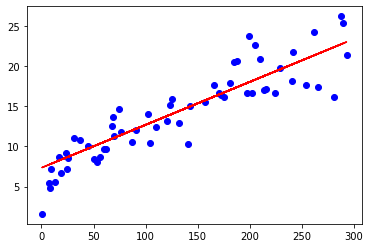

In [31]:
# drawing a straight line for the predicted and actual outputs of testing data

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test,y_predict1,c='r',linestyle='solid')
plt.show()

In [32]:
reg.score(X_test,y_test)

0.8129354232314302

***We observe that the errors are compartively less as seen above and the r2_score of the model is 0.8149986226691329 that shows that our model is a good model***


In [33]:
# importing ridge from linear_model
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [34]:
# fitting the model i.e. making it learn using Ridge Regression algorithm
reg = Ridge(alpha = 10)
reg.fit(X_train,y_train)

Ridge(alpha=10)

In [35]:
#Predicting based on training data and performing evaluation metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_predict = reg.predict(X_train)
mae = mean_absolute_error(y_train,y_predict)
mse = mean_squared_error(y_train,y_predict)
rmse = np.sqrt(mean_squared_error(y_train,y_predict))
r2_sc = r2_score(y_train,y_predict)
print('Performance of model based on the training data:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2_Score: {r2_sc}')

Performance of model based on the training data:
MAE: 1.8188285379014162
MSE: 5.077960011161783
RMSE: 2.2534329391312675
R2_Score: 0.8059411536283139


In [36]:
#Predicting based on testing data  and performing evaluation metrics

y_predict2 = reg.predict(X_test)
mae = mean_absolute_error(y_test,y_predict1)
mse = mean_squared_error(y_test,y_predict1)
rmse = np.sqrt(mean_squared_error(y_test,y_predict1))
r2_sc = r2_score(y_test,y_predict1)
print('Performance of model based on the training data:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2_Score: {r2_sc}')

Performance of model based on the training data:
MAE: 1.8781999778567076
MSE: 5.632208348069091
RMSE: 2.3732274117895003
R2_Score: 0.8129354232314302


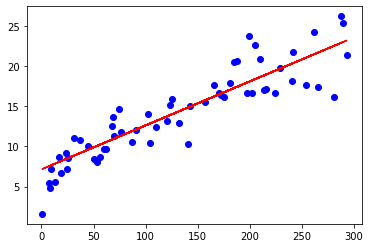

In [37]:
# drawing a straight line for the predicted and actual outputs of testing data

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test,y_predict2,c='r',linestyle='solid')
plt.show()